<a href="https://colab.research.google.com/github/hemu2014/python-data-test/blob/main/dta-sas-other/lesson-19-complementary-file-types-and-io-tools/files/Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68501079-0695df00-023c-11ea-841f-455dac84a089.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Complementary file types and IO tools

The pandas I/O API has a set of top level functions to let us work with a wide variety of file types.

In this lesson we'll show some file types pandas can work with besides the most known CSV, JSON and XLSX types.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Pickling

When it comes to something like machine learning, after training your models, these models can't be saved to a .txt or .csv file, becouse it's an object with complex binary data.

Luckily, in programming, there are various terms for the process of saving binary data to a file that can be accessed later. In Python, this is called **pickling**. You may know it as serialization, or maybe even something else.

For our lucky, pandas handles _pickles_ in its IO module, and all pandas objects are equipped with the `to_pickle` and `read_pickle` methods.

In [2]:
df = pd.DataFrame([[1,2,3], [4,5,6]],
                  columns=['A','B','C'])

df

,A,B,C
0,1,2,3
1,4,5,6


The `to_pickle` method uses Python's `cPickle` module to save data structures to disk using the pickle format.

In [3]:
df.to_pickle('out.pkl')

In [4]:
!cat out.pkl

���      �pandas.core.frame��	DataFrame���)��}�(�_mgr��pandas.core.internals.managers��BlockManager����pandas._libs.internals��_unpickle_block����numpy._core.numeric��_frombuffer���(�0                                                 ��numpy��dtype����i8�����R�(K�<�NNNJ����J����K t�bKK���C�t�R��builtins��slice���K KK��R�K��R���]�(�pandas.core.indexes.base��
_new_Index���h%�Index���}�(�data��numpy._core.multiarray��_reconstruct���h�ndarray���K ��Cb���R�(KK��h�O8�����R�(K�|�NNNJ����J����K?t�b�]�(�A��B��C�et�b�name�Nu��R�h'�pandas.core.indexes.range��
RangeIndex���}�(h@N�start�K �stop�K�step�Ku��R�e��R��_typ��	dataframe��	_metadata�]��attrs�}��_flags�}��allows_duplicate_labels��sub.

The `read_pickle` method can be used to load any pickled pandas object (or any other pickled object) from file:

In [5]:
df = pd.read_pickle('out.pkl')

In [6]:
df

,A,B,C
0,1,2,3
1,4,5,6


In [10]:
df = pd.read_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Clipboard content

A handy way to grab data is to use the `read_clipboard` method, which takes the contents of the clipboard buffer and passes them to the `read_table` method.

For instance, you can copy the following text to the clipboard (CTRL-C on many operating systems):

```
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
```

And then import the data directly to a `DataFrame` by calling `read_clipboard` method.

###在 Jupyter Notebook 中可能无法直接使用（建议用 pd.DataFrame() 手动输入）。

In [11]:
df = pd.read_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

###使用 io.StringIO 模拟剪贴板：

In [13]:
import io
clipboard_data = "Name\tAge\tCity\nAlice\t25\tBeijing\nBob\t30\tShanghai"
df1 = pd.read_csv(io.StringIO(clipboard_data), sep='\t')
df1

,Name,Age,City
0,Alice,25,Beijing
1,Bob,30,Shanghai


###此方法已被舍弃

In [14]:
data = """
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
"""
df = pd.read_csv(pd.compat.StringIO(data), sep='\\s+') # use StringIO to treat the string as a file-like object and sep='\s+' to handle whitespace as delimiter

AttributeError: module 'pandas.compat' has no attribute 'StringIO'

In [15]:
import io
import pandas as pd

data = """
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
"""
# Use io.StringIO instead of pd.compat.StringIO
df = pd.read_csv(io.StringIO(data), sep='\\s+')

In [16]:
df

,A,B,C
x,1,4,p
y,2,5,q
z,3,6,r


The `to_clipboard` method can be used to write the contents of a `DataFrame` to the clipboard.

Following which you can paste the clipboard contents into other applications (CTRL-V on many operating systems).

###在此环境不好测试
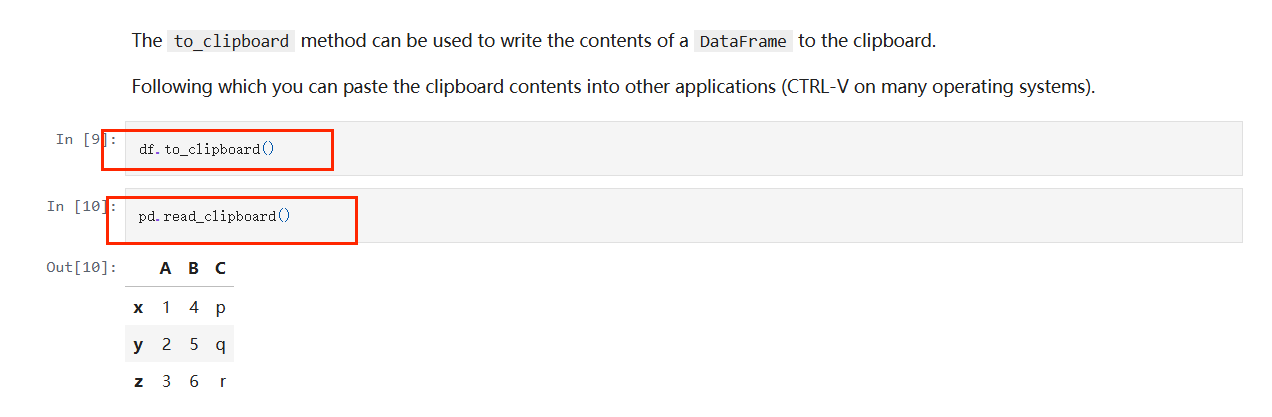

In [21]:
df.to_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

###失败

In [19]:
!apt-get update && apt-get install -y xclip
import os
os.environ['PYPERCLIP_BACKEND'] = 'xclip'
import pandas as pd
data = """
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
"""
df = pd.read_csv(io.StringIO(data), sep='\\s+')
#df.to_clipboard()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

###失败

In [20]:
pd.read_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

In [29]:
import pandas as pd

# 创建一个示例DataFrame
df = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '年龄': [25, 30, 35],
    '城市': ['北京', '上海', '广州']
})

# 将DataFrame复制到剪贴板
df.to_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

We can see that we got the same content back, which we had earlier written to the clipboard.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## SAS files

The top-level function `read_sas()` can read (but not write) SAS xport (.XPT) and (since v0.18.0) SAS7BDAT (.sas7bdat) format files.

SAS files only contain two value types: ASCII text and floating point values (usually 8 bytes but sometimes truncated). For xport files, there is no automatic type conversion to integers, dates, or categoricals. For SAS7BDAT files, the format codes may allow date variables to be automatically converted to dates. By default the whole file is read and returned as a `DataFrame`.

We are going to load the `airline.sav7bdat` file into a pandas `DataFrame` using the `read_sas` method.

In [22]:
!cat airline.sas7bdat

      �               �  0      H  �        D      �  \      t  4       @  4         4       �
  4       �
  4       p
  4       p
              p�@   @�l�?   ���?   �w��?    ף�?    ���? t�@   ����?    ף�?   `���?    �$�?    T��? x�@   ���?   ����?   �m4�?   �?5�?    V�? |�@    +�?   @�?   �K7�?   ����?   �I�? ��@   `�@   @
��?   ���?    ���?   @5^�? ��@   ��@   ज़�?   `���?   `���?    ���? ��@   @33@   �p�?   `���?   @�l�?    ���? ��@   ��~@   `ff�?   �Y�?   `�� @   ��v�? ��@    ��@   ���?    �u�?   @�z@   ����? ��@   ��@   @�A�?   ��|�?   ��@    �x�? ��@    �@@   �$�?   `��?   `�@   �n�? ��@   �=�@   ��C�?   ����?   ���@   ��S�? ��@   �K7@    X9�?   @io�?   �E�@    -��? ��@    )�@   �p�?   @���?    ��@   ���? ��@   ��L@   �=
�?   @6�?    �x	@   `���? ��@    �@   �&1�?    ���?   ��
@   ��S @ ��@   ��J@   �K7�?   ����?   ��K@   @���? ��@   �p="@   �I�?   ���?   `��@    V@ ��@   �$%@    ���?   �H.�?   ��K@   ���@ ��@   �=
*

In [23]:
df = pd.read_sas('airline.sas7bdat')

In [24]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


We can also load the same file from a given URL:

In [25]:
sas_url = 'http://www.principlesofeconometrics.com/sas/airline.sas7bdat'

In [26]:
df = pd.read_sas(sas_url)

In [27]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


Plot a variable:

<Axes: >

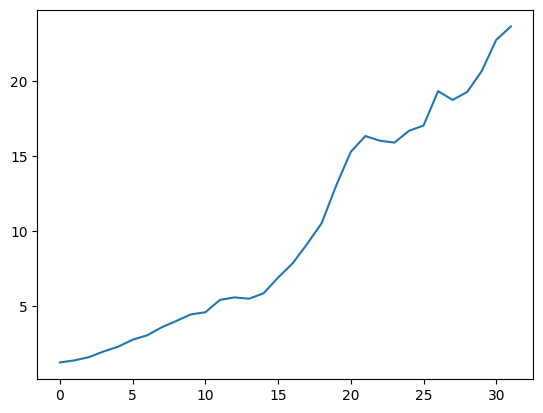

In [28]:
df.loc[:,'Y'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## STATA files

The top-level function `read_stata` will read a DTA file and return either a DataFrame or a **StataReader** that can be used to read the file incrementally.

We are going to load the `broiler.dta` file into a pandas `DataFrame` using the `read_stata` method.

In [30]:
!cat broiler.dta

q  4    �( �        xq�]          & gFb� j��    ��/�rU @b�  �/ �/Ge_ 0        13 Aug 2007 16:58 ������������year                             q  CE                            y  ERT                           pchick                           pbeef                            pcor                             pf                               cpi                              qproda                           pop                              meatex                           time                                                       %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	   %9.0g   	                                                                                                                                                                                                                                                                                                                            

In [34]:
# 转换特定列类型
df = pd.read_stata('broiler.dta', convert_dates=True, convert_categoricals=False)

KeyError: 0

In [48]:
df = pd.read_stata('/content/broiler.dta')

KeyError: 0

In [32]:
!pip install pyreadstat
import pandas as pd
import pyreadstat

df, meta = pyreadstat.read_dta('broiler.dta')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.0 MB/s eta 0:00:00


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [35]:
df = pd.read_stata('broiler.dta', converters={
    'column_name': lambda x: x.decode('latin1')  # 对特定列解码
})

TypeError: read_stata() got an unexpected keyword argument 'converters'

In [43]:
import pandas as pd

# 读取低版本.dta文件
#df = pd.read_stata('/content/broiler.dta')

# 如果出现编码问题，可以尝试
df = pd.read_stata('/content/broiler.dta', convert_categoricals=False)

KeyError: 0

In [ ]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


We can also load the same file from a given URL:

In [36]:
stata_url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

In [37]:
df = pd.read_stata(stata_url)

In [38]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


Plot the Consumer Price Index (CPI):

<Axes: >

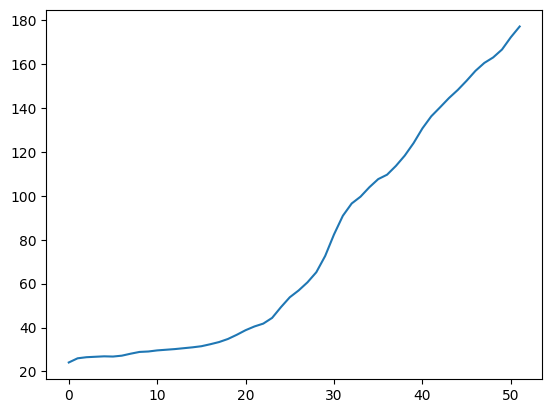

In [49]:
df.loc[:,'cpi'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Google BigQuery

Google BigQuery data can be loaded using pandas `read_gbq` method.

This method requires the `pandas-gbq` package and a _BigQuery project_ (you can create a new one from [here](https://console.cloud.google.com/bigquery)).

###之后在去深入了解
BigQuery 的核心价值在于 将大规模数据分析的门槛降至最低，同时提供实时处理、AI 集成和跨云协作能力，帮助企业从数据中快速提取洞察，驱动决策

In [50]:
!pip install pandas_gbq

In [51]:
import pandas_gbq

In [52]:
sql = """
    SELECT name, SUM(number) as count
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    GROUP BY name
    ORDER BY count DESC
    LIMIT 10
"""

pandas_gbq.read_gbq(sql,
                    project_id='MY_PROJECT_ID')

Error: could not locate runnable browser

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)